# USDA Food Data
#### Weekly retail food sales by State and product category	 	 	 	 

Version  | Date | Author | Notes |
:-------:|:----:|:-------|:-----:|
0.1 |2 August 2023| Ken Dizon | Initial version |
0.2 |9 August 2023| Ken Dizon | Greater emphais on phasing |

**Objective:** Create a data visualizations using data from https://www.ers.usda.gov/data-products/weekly-retail-food-sales/ 
### Content & Phases
- Libraries
1. Data Exploration
    * Categorical
    * Quantitative - Sample Statistics
2. Preprocessing
    * 2.1 Cleaning Approach
    * 2.2 User Input
        - 2.2.1 Subsets
3. Visualization
    * 3.1 Bar
    * 3.2 Box
    * 3.3 Line
    * 3.4 Scatter
0. DevOps Test Env

In [1]:
try:
    import numpy as np #math library
    import random
    import matplotlib.pyplot as plt #visualization
    %matplotlib inline
    import pandas as pd #dataframes
    
    print("Libraries imported successfully!")
except ImportError:
    print("Libraries not installed. Please install it to use this library.")

Libraries imported successfully!


________________________
# Load data
The Weekly Retail Food Sales series is based on proprietary scanner data from a nationally representative sample of retail food establishments collected by Circana (formerly Information Resources Inc. [IRI]). Sales data are reported weekly, beginning with the week ending October 6, 2019. The data was last update 7/7/2023.

We have done some rough cleaning of the excel file and now we can re-load that file as csv

In [2]:
# Raw File
file_path = '/Users/Kenny/Documents/DataSets/Raw_USDA-FoodData.csv'
df = pd.read_csv(file_path)
df.head()

,Unnamed: 0,Date,State,Category,Dollars,Unit sales,Dollars last year,Unit sales last year,Dollars 3 years ago,Unit sales 3 years ago,Percent change dollars 1 year,Percent change units 1 year,Percent change dollars 3 years,Percent change units 3 years
0,1,2019-10-06,Alabama,Alcohol,23611285.0,2974221.0,22449300.0,2979065.0,NaN,NaN,5.2,-0.2,NaN,NaN
1,2,2019-10-13,Alabama,Alcohol,23220758.0,2895573.0,23314625.0,2978312.0,NaN,NaN,-0.4,-2.8,NaN,NaN
2,3,2019-10-20,Alabama,Alcohol,21770283.0,2730939.0,21070374.0,2745973.0,NaN,NaN,3.3,-0.5,NaN,NaN
3,4,2019-10-27,Alabama,Alcohol,21956558.0,2764970.0,20188919.0,2651957.0,NaN,NaN,8.8,4.3,NaN,NaN
4,5,2019-11-03,Alabama,Alcohol,23183482.0,2872683.0,22565261.0,2884813.0,NaN,NaN,2.7,-0.4,NaN,NaN


In [3]:
df.tail(3)

,Unnamed: 0,Date,State,Category,Dollars,Unit sales,Dollars last year,Unit sales last year,Dollars 3 years ago,Unit sales 3 years ago,Percent change dollars 1 year,Percent change units 1 year,Percent change dollars 3 years,Percent change units 3 years
88926,88927,"Source: USDA, Economic Research Service calcul...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88927,88928,"Data as of May 7, 2023.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88928,88929,"Errata: On July 7, 2023, the volume sales data...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


________________________
# [1] Data Exploration

In [4]:
# Drop the first Index column
df = df.drop(df.columns[0], axis=1)

In [5]:
print('Number of Rows:', df.shape[0])
print('Number of Columns:', df.shape[1])

Number of Rows: 88929
Number of Columns: 13


In [6]:
# Taking a look at the columns, data rows, data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88929 entries, 0 to 88928
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Date                            88929 non-null  object 
 1   State                           88924 non-null  object 
 2   Category                        88924 non-null  object 
 3   Dollars                         88924 non-null  float64
 4   Unit sales                      88911 non-null  float64
 5   Dollars last year               88645 non-null  float64
 6   Unit sales last year            88621 non-null  float64
 7   Dollars 3 years ago             39456 non-null  float64
 8   Unit sales 3 years ago          39454 non-null  float64
 9   Percent change dollars 1 year   88645 non-null  float64
 10  Percent change units 1 year     88621 non-null  float64
 11  Percent change dollars 3 years  39456 non-null  float64
 12  Percent change units 3 years    

In [7]:
# Show column names
df.columns

Index(['Date', 'State', 'Category', 'Dollars', 'Unit sales',
       'Dollars last year', 'Unit sales last year', 'Dollars 3 years ago',
       'Unit sales 3 years ago', 'Percent change dollars 1 year',
       'Percent change units 1 year', 'Percent change dollars 3 years',
       'Percent change units 3 years'],
      dtype='object')

### 1.1 Categorical

In [8]:
# Date 
print(df['Date'].iloc[0])
print(df['Date'].iloc[-1])

2019-10-06
Errata: On July 7, 2023, the volume sales data were removed due to errors in converting some unit values to volumes.  They will not be restored due to the complexity of the data.     


- [ ] Date type is incorrect `object` must be changed to `datetime`

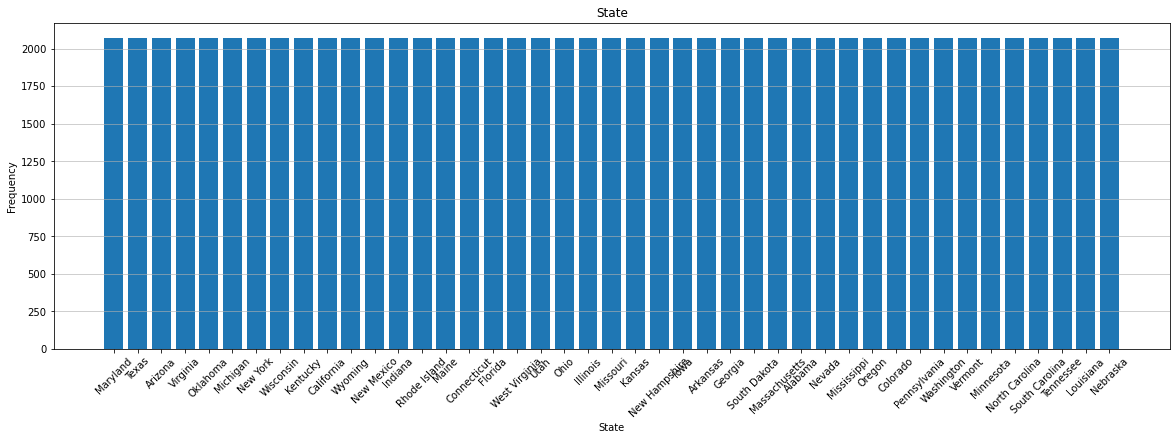

In [9]:
# State
state_counts = df['State'].value_counts()

# plot
plt.figure(figsize=(20, 6))
plt.bar(state_counts.index, state_counts.values)
# style
plt.xlabel('State')
plt.ylabel('Frequency')
plt.title('State')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)  # Add gridlines for better readability
plt.show()

In [10]:
print('Number of US States:', df['State'].nunique())
df['State'].unique()

Number of US States: 43


array(['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Florida', 'Georgia', 'Illinois', 'Indiana', 'Iowa',
       'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Nebraska', 'Nevada', 'New Hampshire', 'New Mexico',
       'New York', 'North Carolina', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', nan], dtype=object)

Each state count is equal distributed and has around 2000 inputs. 

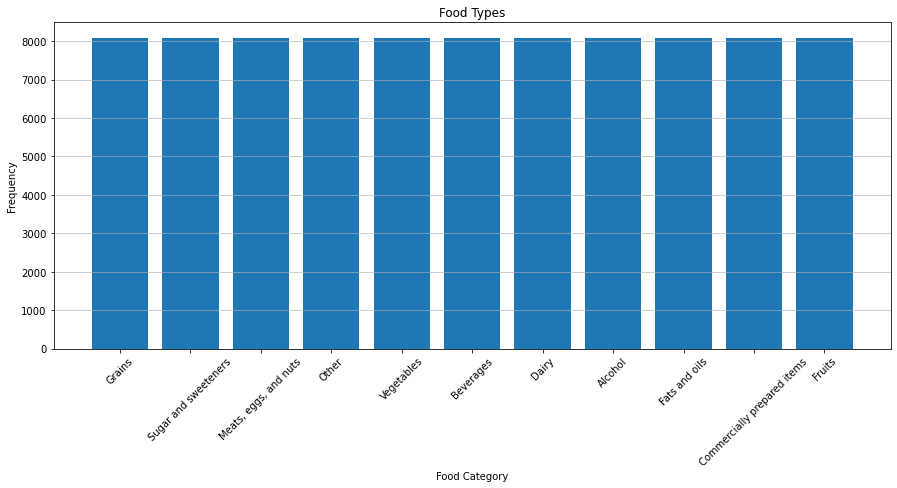

In [11]:
# Category
category_counts = df.Category.value_counts()

# size
plt.figure(figsize=(15, 6))
plt.bar(category_counts.index, category_counts.values)
# style
plt.xlabel('Food Category')
plt.ylabel('Frequency')
plt.title('Food Types')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)  # Add gridlines for better readability
plt.show()

In [12]:
print(df['Category'].unique())
print(df['Category'].nunique())

['Alcohol' 'Beverages' 'Commercially prepared items' 'Dairy'
 'Fats and oils' 'Fruits' 'Grains' 'Meats, eggs, and nuts' 'Other'
 'Sugar and sweeteners' 'Vegetables' nan]
11


Each category is also equally distibuted. 

### 1.2 Quantitative - Sample Statistics
> it is worthwhile to think of univariate non-graphical EDA as telling you about aspects
of the histogram of the distribution of the variable of interest.

UNIVARIATE NON-GRAPHICAL EDA | Info |
:----------------------------|:-----|
central tendency | mean |
spread | standard deviation (std) | 
Skeweness | a symmetry | 
Kurtosis | peakedness | 

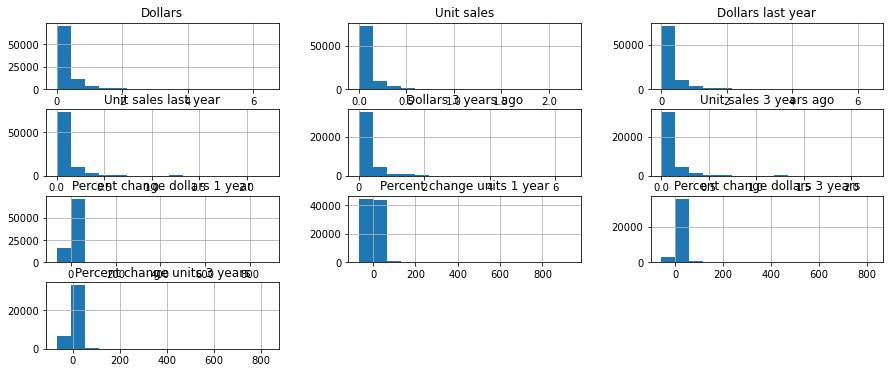

In [13]:
# Histogram to show the distribution
df.hist(figsize=(15, 6), bins=15) 
plt.show() 

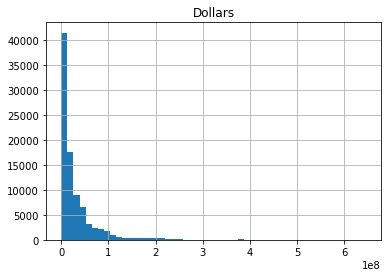

In [14]:
# Column selection
df.hist(column='Dollars', figsize=(6, 4), bins=50)
plt.show()

All columns have a skewness about them. Mainly left skewed. 

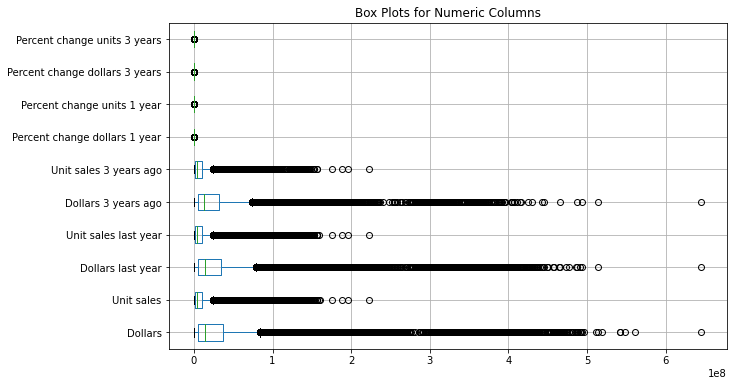

In [16]:
# Boxplot for Outlier Detection for all numeric columns

plt.figure(figsize=(10, 6))
df.boxplot(vert=False)
plt.title("Box Plots for Numeric Columns")
plt.xticks#(rotation=45)
plt.show()

In [17]:
# Lets look at the findings in table format
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Dollars,88924.0,3.105876e+07,4.828215e+07,49487.0,5272676.75,14457420.0,36664129.50,645204422.0
Unit sales,88911.0,9.319661e+06,1.502147e+07,4437.0,1210617.00,4253587.0,10648093.50,222514654.0
Dollars last year,88645.0,2.897575e+07,4.483888e+07,50027.0,4923590.00,13590416.0,34408583.00,645079538.0
Unit sales last year,88621.0,9.329165e+06,1.505187e+07,4437.0,1209978.00,4243772.0,10610063.00,222471054.0
Dollars 3 years ago,39456.0,2.714275e+07,4.225449e+07,50027.0,4602840.25,12730660.5,32340687.75,645079538.0
Unit sales 3 years ago,39454.0,9.233071e+06,1.502736e+07,4577.0,1197468.75,4163512.0,10443544.00,222471054.0
Percent change dollars 1 year,88645.0,8.192009e+00,1.475513e+01,-63.6,1.20,7.4,13.50,880.6
Percent change units 1 year,88621.0,1.026490e+00,1.424477e+01,-67.4,-4.90,-0.8,4.90,931.4
Percent change dollars 3 years,39456.0,2.217205e+01,1.766307e+01,-59.0,14.00,22.6,31.10,823.6
Percent change units 3 years,39441.0,1.211937e-03,1.573627e+01,-69.3,-6.10,-0.1,6.10,828.6


Based on the numeric column, there is a large spread in amount 

**NOTE** 
- Central Tendency: can't be represented properly due to different scales. This may be resolved on an indivudal level when seperated by each state. 
- Spread: Fairly high values a big std anything greater than <= 2. This means dollar's are the main column.
- Skewness/Kurtosis: based on histogram left skewed with % change being right skewed. 

# [2] Data Preprocessing

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88929 entries, 0 to 88928
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Date                            88929 non-null  object 
 1   State                           88924 non-null  object 
 2   Category                        88924 non-null  object 
 3   Dollars                         88924 non-null  float64
 4   Unit sales                      88911 non-null  float64
 5   Dollars last year               88645 non-null  float64
 6   Unit sales last year            88621 non-null  float64
 7   Dollars 3 years ago             39456 non-null  float64
 8   Unit sales 3 years ago          39454 non-null  float64
 9   Percent change dollars 1 year   88645 non-null  float64
 10  Percent change units 1 year     88621 non-null  float64
 11  Percent change dollars 3 years  39456 non-null  float64
 12  Percent change units 3 years    

In [19]:
# Missing values
df.isnull().sum().sort_values(ascending=False)

Percent change units 3 years      49488
Unit sales 3 years ago            49475
Dollars 3 years ago               49473
Percent change dollars 3 years    49473
Unit sales last year                308
Percent change units 1 year         308
Dollars last year                   284
Percent change dollars 1 year       284
Unit sales                           18
State                                 5
Category                              5
Dollars                               5
Date                                  0
dtype: int64

In [20]:
# Visualize missing values
    #Numerically
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Percent change units 3 years,49488,0.556489
Unit sales 3 years ago,49475,0.556343
Dollars 3 years ago,49473,0.556320
Percent change dollars 3 years,49473,0.556320
Unit sales last year,308,0.003463
Percent change units 1 year,308,0.003463
Dollars last year,284,0.003194
Percent change dollars 1 year,284,0.003194
Unit sales,18,0.000202
State,5,0.000056


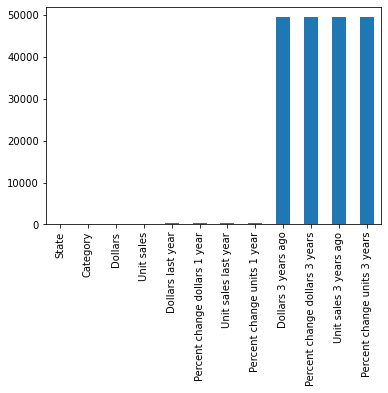

In [21]:
#Graphically
missing = df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
_ = missing.plot.bar()

## 2.1 Cleaning Approach
- Dtype: convert the 'date' to datetime.date
- Most of the missing data relates back to the 3 year period. This does not seem very useful as 50% of our data would be missing. There are multiple approaches one could take:
    * 1. Delete all rows containing NaN; this means that 8000 rows could turn into 4000
    * 2. Remove these columns. I would still have around 8000 rows and 99% of my data
    * 3. Have option 2 but have option 1 be a subset

In [22]:
# Date
df['Date'] = pd.to_datetime(df['Date'], errors='coerce') # ERROR: df['Date'] = 'NA = data are not available'

In [23]:
date_range_min = df['Date'].min()
date_range_max = df['Date'].max()
print(df['Date'].dtype)
print(f"Date Range: {date_range_min} - {date_range_max}")

datetime64[ns]
Date Range: 2019-10-06 00:00:00 - 2023-05-07 00:00:00


In [24]:
# State
print('Number of US States:', df['State'].nunique())
df['State'].unique()

Number of US States: 43


array(['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Florida', 'Georgia', 'Illinois', 'Indiana', 'Iowa',
       'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Nebraska', 'Nevada', 'New Hampshire', 'New Mexico',
       'New York', 'North Carolina', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', nan], dtype=object)

In [25]:
# backup failsafe
data = df.copy()

In [26]:
# df1: Data without 3 years

# drop columns
df1 = data.drop(data.columns[[7, 8, 11, 12]],axis = 1)
df1 = df1.dropna()
df1.head()

,Date,State,Category,Dollars,Unit sales,Dollars last year,Unit sales last year,Percent change dollars 1 year,Percent change units 1 year
0,2019-10-06,Alabama,Alcohol,23611285.0,2974221.0,22449300.0,2979065.0,5.2,-0.2
1,2019-10-13,Alabama,Alcohol,23220758.0,2895573.0,23314625.0,2978312.0,-0.4,-2.8
2,2019-10-20,Alabama,Alcohol,21770283.0,2730939.0,21070374.0,2745973.0,3.3,-0.5
3,2019-10-27,Alabama,Alcohol,21956558.0,2764970.0,20188919.0,2651957.0,8.8,4.3
4,2019-11-03,Alabama,Alcohol,23183482.0,2872683.0,22565261.0,2884813.0,2.7,-0.4


In [34]:
print('Missing data:', df1.isnull().values.any())
print('Number of Rows:', df1.shape[0])
print('Number of Columns:', df1.shape[1])

Missing data: False
Number of Rows: 88621
Number of Columns: 9


In [28]:
# drop missing values in rows
df2 = data.dropna()
df2.head()

,Date,State,Category,Dollars,Unit sales,Dollars last year,Unit sales last year,Dollars 3 years ago,Unit sales 3 years ago,Percent change dollars 1 year,Percent change units 1 year,Percent change dollars 3 years,Percent change units 3 years
104,2021-10-03,Alabama,Alcohol,25445587.0,2927050.0,26247251.0,3049093.0,22449300.0,2979065.0,-3.1,-4.0,13.3,-1.7
105,2021-10-10,Alabama,Alcohol,25422750.0,2908756.0,25118109.0,2959993.0,23314625.0,2978312.0,1.2,-1.7,9.0,-2.3
106,2021-10-17,Alabama,Alcohol,24991550.0,2907719.0,25280934.0,2978370.0,21070374.0,2745973.0,-1.1,-2.4,18.6,5.9
107,2021-10-24,Alabama,Alcohol,24260562.0,2799394.0,24802908.0,2912923.0,20188919.0,2651957.0,-2.2,-3.9,20.2,5.6
108,2021-10-31,Alabama,Alcohol,24510140.0,2825299.0,26472604.0,3083445.0,22565261.0,2884813.0,-7.4,-8.4,8.6,-2.1


In [29]:
print('Missing data:', df2.isnull().values.any())
print(df2.shape)

Missing data: False
(39429, 13)


In [30]:
# recopy df1 as the main df
df = df1.copy()

- `df` contains majority of data without the historical 3 year portion 
- `df2` contains more historical data approaching > 3 year difference markers

We can now manipulate df and df2 as we please

## 2.2 User Input 

In [36]:
selected_year = 2020 #int(input('Enter your Year:'))
selected_month = 7 #int(input('Enter your Month:'))
selected_state = 'Colorado' #str(input('Enter your State:'))
selected_category = 'Beverages' #str(input('Enter your Category:'))

### 2.2.1 Subsets

In [42]:
# Date Subset

# Extract the year and month from the 'Date' column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Year Subset
df_Year = df[df['Year'] == selected_year]
df_Year.head()

,Date,State,Category,Dollars,Unit sales,Dollars last year,Unit sales last year,Percent change dollars 1 year,Percent change units 1 year,Year,Month
13,2020-01-05,Alabama,Alcohol,21567138.0,2639782.0,19528730.0,2437819.0,10.4,8.3,2020,1
14,2020-01-12,Alabama,Alcohol,19396186.0,2465199.0,18538508.0,2393258.0,4.6,3.0,2020,1
15,2020-01-19,Alabama,Alcohol,20285818.0,2540965.0,18063041.0,2310107.0,12.3,10.0,2020,1
16,2020-01-26,Alabama,Alcohol,19559231.0,2426600.0,18444817.0,2344732.0,6.0,3.5,2020,1
17,2020-02-02,Alabama,Alcohol,20591010.0,2580436.0,19633251.0,2501591.0,4.9,3.2,2020,2


In [43]:
# Year-Month Subset = time
df_Time = df[(df['Year'] == selected_year) & (df['Month'] == selected_month)]
df_Time.head()

,Date,State,Category,Dollars,Unit sales,Dollars last year,Unit sales last year,Percent change dollars 1 year,Percent change units 1 year,Year,Month
39,2020-07-05,Alabama,Alcohol,29682914.0,3325527.0,28576337.0,3404828.0,3.9,-2.3,2020,7
40,2020-07-12,Alabama,Alcohol,25817315.0,3008214.0,22465170.0,2847357.0,14.9,5.6,2020,7
41,2020-07-19,Alabama,Alcohol,26493111.0,3073839.0,23133694.0,2902702.0,14.5,5.9,2020,7
42,2020-07-26,Alabama,Alcohol,25483751.0,3004478.0,23363490.0,2921828.0,9.1,2.8,2020,7
227,2020-07-05,Arizona,Alcohol,48743770.0,5549362.0,41439145.0,5153157.0,17.6,7.7,2020,7


In [44]:
# State Subset
df_State = df[df['State'] == selected_state]
df_State.head()

,Date,State,Category,Dollars,Unit sales,Dollars last year,Unit sales last year,Percent change dollars 1 year,Percent change units 1 year,Year,Month
752,2019-10-06,Colorado,Alcohol,6818370.0,812881.0,2275113.0,241328.0,199.7,236.8,2019,10
753,2019-10-13,Colorado,Alcohol,6752102.0,797992.0,2208511.0,231427.0,205.7,244.8,2019,10
754,2019-10-20,Colorado,Alcohol,6733582.0,801081.0,2136801.0,226230.0,215.1,254.1,2019,10
755,2019-10-27,Colorado,Alcohol,6699795.0,785174.0,2185748.0,231012.0,206.5,239.9,2019,10
756,2019-11-03,Colorado,Alcohol,6683158.0,773529.0,2203943.0,229820.0,203.2,236.6,2019,11


In [45]:
# Year and State Specialization 
df_YearState = df_Year[df_Year['State'] == selected_state]
df_YearState.head()

,Date,State,Category,Dollars,Unit sales,Dollars last year,Unit sales last year,Percent change dollars 1 year,Percent change units 1 year,Year,Month
765,2020-01-05,Colorado,Alcohol,6859631.0,769412.0,3139154.0,325684.0,118.5,136.2,2020,1
766,2020-01-12,Colorado,Alcohol,5625317.0,690392.0,3594466.0,384630.0,56.5,79.5,2020,1
767,2020-01-19,Colorado,Alcohol,6084943.0,740940.0,3977296.0,428194.0,53.0,73.0,2020,1
768,2020-01-26,Colorado,Alcohol,5989725.0,736070.0,4057755.0,439236.0,47.6,67.6,2020,1
769,2020-02-02,Colorado,Alcohol,6786565.0,813487.0,4757617.0,511698.0,42.6,59.0,2020,2


In [46]:
# Category food type data
df_Cat = df[df['Category'] == selected_category]
df_Cat.head()

,Date,State,Category,Dollars,Unit sales,Dollars last year,Unit sales last year,Percent change dollars 1 year,Percent change units 1 year,Year,Month
8084,2019-10-06,Alabama,Beverages,45672546.0,20412409.0,43114637.0,19907130.0,5.9,2.5,2019,10
8085,2019-10-13,Alabama,Beverages,42870720.0,18983767.0,42568305.0,19359495.0,0.7,-1.9,2019,10
8086,2019-10-20,Alabama,Beverages,40012371.0,17521492.0,40389764.0,18295287.0,-0.9,-4.2,2019,10
8087,2019-10-27,Alabama,Beverages,38765535.0,16989314.0,37355821.0,16857336.0,3.8,0.8,2019,10
8088,2019-11-03,Alabama,Beverages,38673829.0,16846506.0,39081574.0,17587200.0,-1.0,-4.2,2019,11


___________
# [3] Data Visualization
Plot  | Use Case |
:-----|:---------|
Line | [trends over time] [compare datasets with continuous variable] |
Bar | [compare different categories or groups] [discrete data that has distinct classes] |
Scatter | [examine the relationship between two continuous variables] [detect outliers] [identify clusters/groups] | 
Box | [compare distribution of a continuous variable across different classes] [examine summary statistics: spread/skewness/quartiles/outliers ] | 
Histogram | [data distribution] [shape of data] [skewness, variability, spread]

### 3.1 Bar
- What are the 3 highest and lowest Dollar spending states in the US?

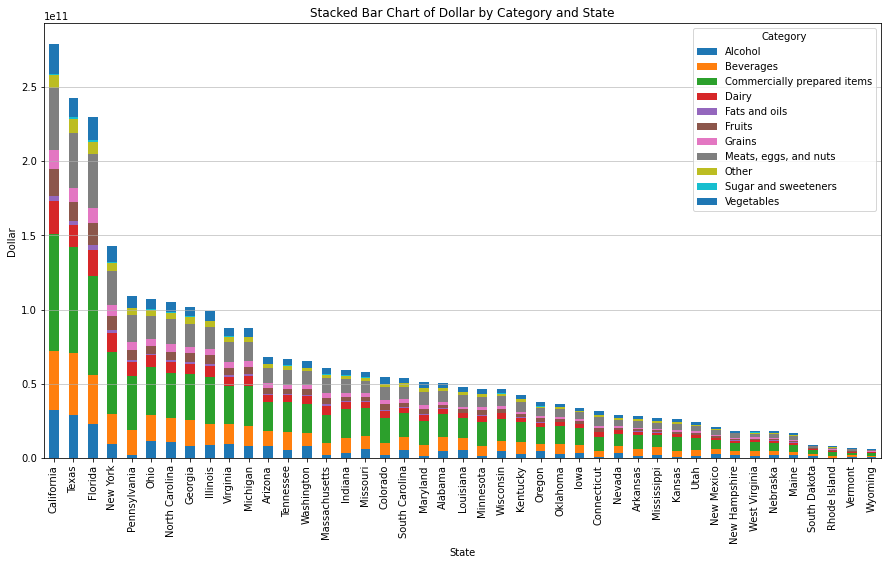

In [47]:
# Group the data by 'State' and 'Category' and sum the 'Dollar' values
grouped = df.groupby(['State', 'Category'])['Dollars'].sum().unstack()

# Calculate the total dollar amount for each state
state_totals = grouped.sum(axis=1)
# Sort the states by descending total dollar amount
sorted_states = state_totals.sort_values(ascending=False).index
# Reorder the grouped data based on the sorted states
state_spending = grouped.loc[sorted_states]


# Create a stacked bar chart
state_spending.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.xlabel('State')
plt.ylabel('Dollar')
plt.title('Stacked Bar Chart of Dollar by Category and State')
plt.legend(title='Category')
plt.grid(axis='y', alpha=0.75)
plt.show()

### 3.2 Box

In [48]:
### Inputs ###

# Choose random states
random.seed(22)  # Change For reproducibility
selected_states = random.sample(df['State'].unique().tolist(), 5)

print(selected_year)
print(selected_states)
print(selected_category) 

2020
['Illinois', 'Maryland', 'Arizona', 'Washington', 'Oklahoma']
Beverages


In [51]:
# Filter the data for the selected states and 'x' category
filtered_data = df_Year[(df_Year['State'].isin(selected_states)) & 
                        (df_Year['Category'] == selected_category)]
filtered_data.head()

,Date,State,Category,Dollars,Unit sales,Dollars last year,Unit sales last year,Percent change dollars 1 year,Percent change units 1 year,Year,Month
8285,2020-01-05,Arizona,Beverages,40096908.0,15830901.0,37900788.0,15812688.0,5.8,0.1,2020,1
8286,2020-01-12,Arizona,Beverages,40369581.0,16207447.0,37972073.0,15871514.0,6.3,2.1,2020,1
8287,2020-01-19,Arizona,Beverages,40414486.0,16244940.0,37894220.0,15740366.0,6.7,3.2,2020,1
8288,2020-01-26,Arizona,Beverages,39229876.0,15945383.0,38106564.0,15903303.0,2.9,0.3,2020,1
8289,2020-02-02,Arizona,Beverages,41399121.0,16846741.0,40045027.0,17037373.0,3.4,-1.1,2020,2


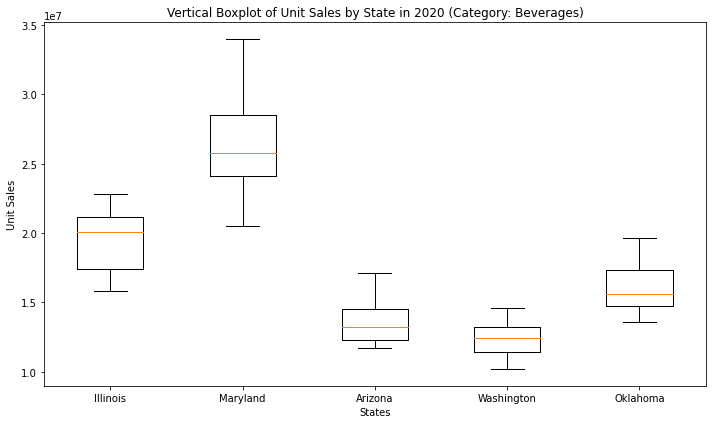

In [52]:
# Create a vertical boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(filtered_data.groupby('State')['Unit sales'].apply(list).tolist())
plt.ylabel('Unit Sales')
plt.xlabel('States')
plt.title('Vertical Boxplot of Unit Sales by State in 2020 (Category: {})'.format(selected_category))
plt.xticks(range(1, len(selected_states) + 1), selected_states)
plt.tight_layout()
plt.show()

### 3.3 Line

In [53]:
#selected_state = 'Colorado' #str(input('Enter your State:'))
#selected_category = 'Fruits' #str(input('Enter your category:'))

# Filter the DataFrame based on the selected categorical values
dfX = df[(df['State'] == selected_state) & (df['Category'] == selected_category)]

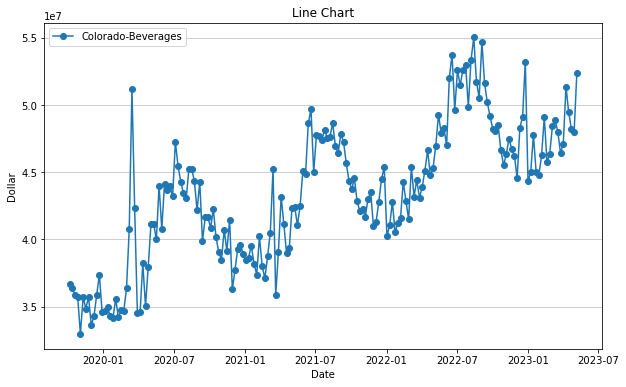

In [54]:
# Create a line chart
plt.figure(figsize=(10, 6))

plt.plot(dfX['Date'], dfX['Dollars'],
         marker='o', label=f'{selected_state}-{selected_category}')

plt.xlabel('Date')
plt.ylabel('Dollar')
plt.title('Line Chart')
plt.grid(axis='y', alpha=0.75)
plt.legend()
plt.show()

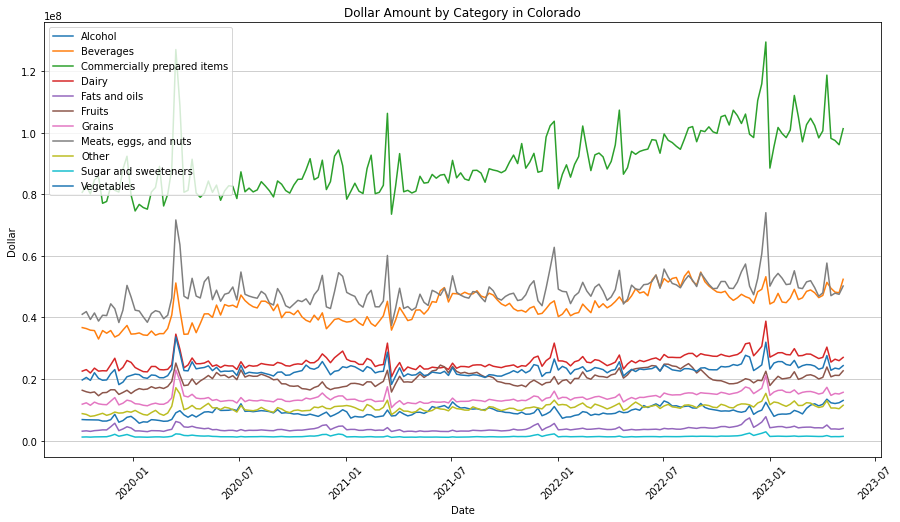

In [58]:
# Set figure size
plt.figure(figsize=(15, 8))

# Loop through unique values in the 'Category' column
for category in df_State['Category'].unique():
    category_data = df_State[df_State['Category'] == category]
    
    plt.plot(category_data['Date'], category_data['Dollars'], label=category)
    
plt.xlabel('Date')
plt.ylabel('Dollar')
plt.title(f'Dollar Amount by Category in {selected_state}')
plt.grid(axis='y', alpha=0.75)
plt.legend()
plt.xticks(rotation=45)
plt.show()

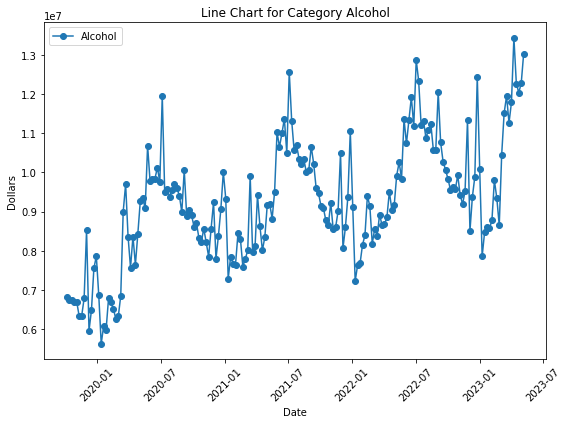

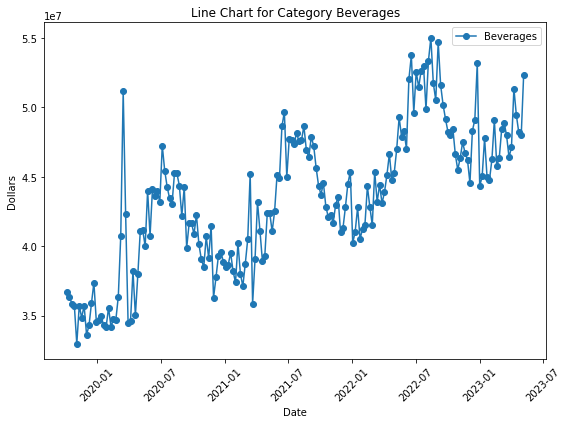

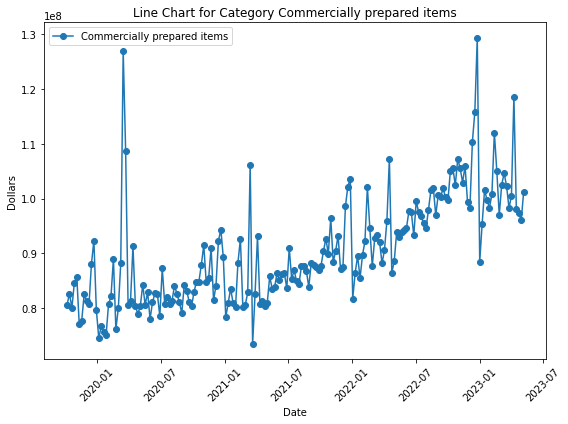

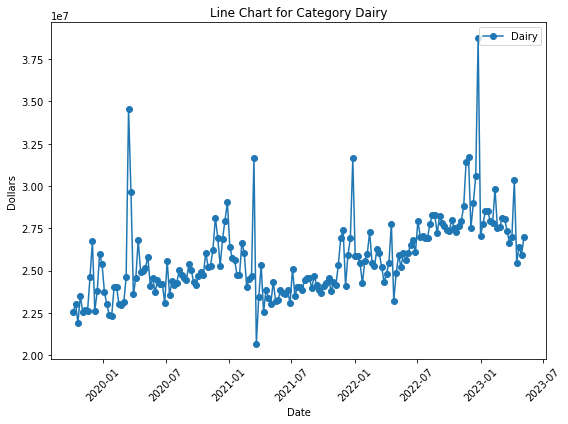

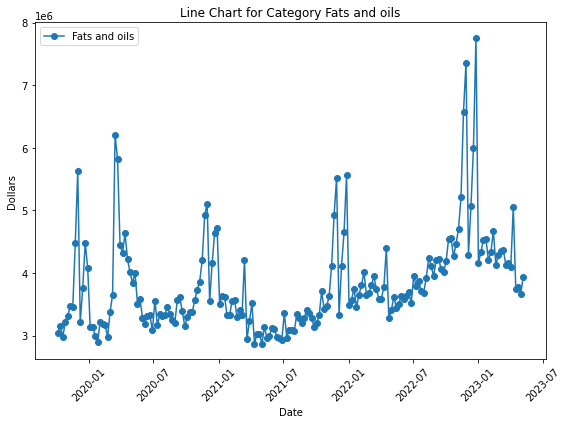

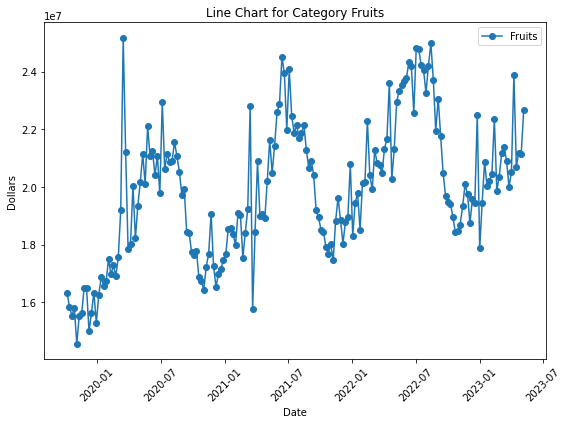

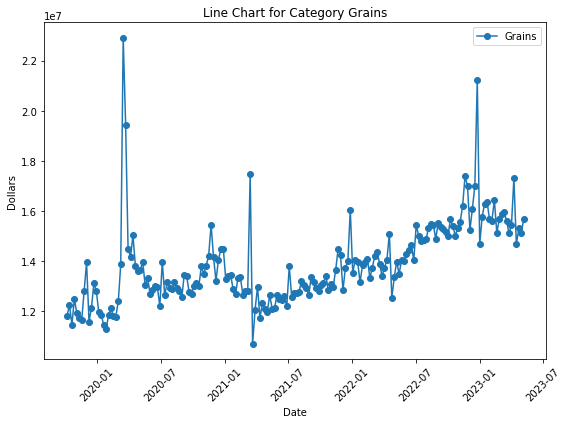

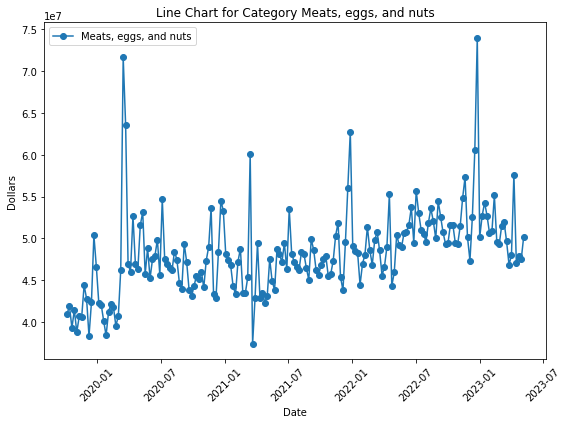

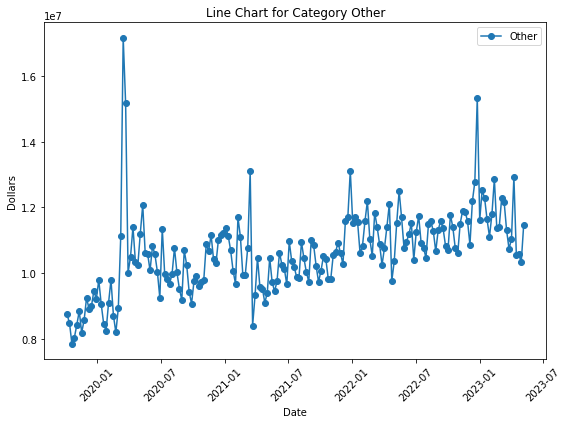

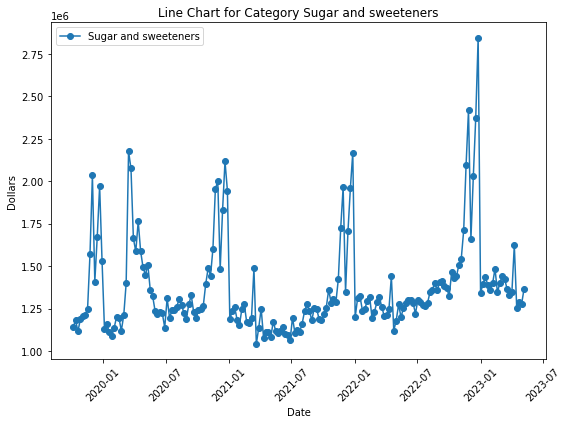

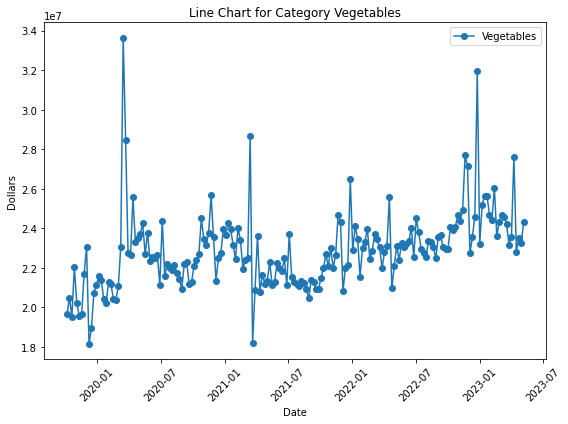

In [59]:
# Group the data by 'Category' and iterate through each group
for category, group in df_State.groupby('Category'):
    plt.figure(figsize=(8, 6))  # Create a new figure for each line chart
    plt.plot(group['Date'], group['Dollars'], marker='o', label=category)
    plt.xlabel('Date')
    plt.ylabel('Dollars')
    plt.title(f'Line Chart for Category {category}')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.legend()
    plt.tight_layout()  # Adjust layout to prevent overlapping
    plt.show()

### 3.4 Scatter

________________________
# [0] DevOps Test Env

**THINGS to Consider:**
- US view state vs state
- State (Geolocation) specific analysis
- Product specific analysis

`Question`: Compare Alcohol Sales between each state for the year 2020.